# Experimental exclusion limits from 1612.07818.
Input masses in [GeV], lifetimes - in [ps]

In [ ]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
# from numpy.core.defchararray import 
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [ ]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [ ]:
#Adding a region manually

# x = np.linspace(0.2, 5, 50)
# y = np.linspace(2*10**(-4),1*10**(-2), 300)
# xv, yv = np.meshgrid(x, y)

# outputfile="m-alpha_points/grid_0.2-5_2e-4-e-2.dat"

# with open(outputfile, 'w+') as fout:
#     fout.write("#m(phi) [GeV]\talpha\n")
#     np.savetxt(fout, np.transpose([xv.flatten(),yv.flatten()]), fmt='%7f')

# Plotting the exclusion scatter plot

In [69]:
# # general plotting function
# def plotGen(inputfile, lineScatterOrFill, color, linewidthORmarkersize):
#     data = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
#     data=data[np.argsort(data[:, 0])]
    
#     if (lineScatterOrFill=="line"):
#         plt.plot(data[:,0],data[:,1],c=color,linewidth=linewidthORmarkersize)
#     if (lineScatterOrFill=="scatter"):
#         plt.plot(data[:,0],data[:,1],c=color,s=linewidthORmarkersize)
#     if (lineScatterOrFill=="fill"):
#         plt.fill_between(data[:,0],data[:,1],10**(-2),color=color,linewidth=linewidthORmarkersize,alpha=0.5)

# #Plot all the data in folder
# def plotFromFolder(folder,iftoreverse,lineScatterOrFill,colorMAP,width):
#     colormap=colorMAP
    
#     #reading files with histos info (reverse fuction changes the order of the files)
#     files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
#     #print(files)
    
#     normalize = mcolors.Normalize(0, len(files))
    
#     global usedcolors
#     usedcolors=[]
#     for filenum, file in enumerate(files):
#         print(file)
        
#         plotGen(file,lineScatterOrFill,colormap(normalize(filenum)),width)
        
#         usedcolors.append(colormap(normalize(filenum)))
#     #print(usedcolors)
    
# function to plot the allowed/excluded points. It will be plotted in (x,y)-plane with
# the third parameter chosen as z=zfixed
def plotAllowed(inputfile,x,y,z,zfixed):
    inputparams = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
    
    #choosing only rows with z=zfixed
    zfixedonly=inputparams[:,z]==zfixed
    params=inputparams[zfixedonly]

    allowed=params[:,5]==1

    plt.scatter(params[allowed,x], params[allowed,y], c='green',s=1)
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red',s=1)

# function to plot the allowed/excluded points. It will be plotted in (x,y)-plane
def plotAllAllowed(inputfile,x,y,prompt=False):
    dotsize=13
    inputparams = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
    
#     excluding tau and m not covered by the search
    searched=(inputparams[:,0]>214*10**-3) & (inputparams[:,0]<4350*10**-3) & \
              (inputparams[:,1]>10**-1) & (inputparams[:,1]<10**3)
    searchedPrompt= (inputparams[:,1]<2*10**-1) # resolution taken from p.3 in 1508.04094
    
    params=inputparams[searched]
    params=inputparams

    allowed=params[:,5]==1
    
    plt.scatter(params[allowed,x], params[allowed,y], c='green',s=dotsize)
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red',s=dotsize)
    
    if (prompt==False):
        plt.scatter(inputparams[~searched,x], inputparams[~searched,y], c='grey',s=dotsize+1)
    else:
        plt.scatter(inputparams[~searchedPrompt,x], inputparams[~searchedPrompt,y], c='grey',s=dotsize+1)
    
# function that plots cut-out regions from 1612.07818

def whiteregions(m):
    return np.heaviside(m - 0.25,0)*np.heaviside(-m + 0.4,0) + np.heaviside(m - 0.5,0)*np.heaviside(-m + 2.9,0)\
    + np.heaviside(m - 3.2,0)*np.heaviside(-m + 3.6,0) + np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)
#     return np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)

def plotWhiteRegions(yupper):
    m=np.linspace(0.2,5,num=10000);
    plt.fill_between(m,(1-whiteregions(m))*yupper,0,color="black",zorder=4)


# Toy model

## mass-tau plane

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
plotWhiteRegions(10**(3))

prodBR=4.000000e-10

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_full_comb.dat",0,1,3,prodBR)


ax.set_title('$BR(B\\rightarrow K a)={}$'.format(prodBR))
ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$\\tau_a [ps]$')
ax.set_xscale("log")
ax.set_yscale("log")
xtlabels=np.concatenate([np.arange(0.2,1,0.1),np.arange(1,5,1)])

ax.set_xticks(xtlabels)
ax.set_xticklabels(map(lambda x: f"{x:0.4}", xtlabels));

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
plotWhiteRegions(10**(3))

prodBR=8.000000e-10

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_full_comb.dat",0,1,3,prodBR)


ax.set_title('$BR(B\\rightarrow K a)={}$'.format(prodBR))
ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$\\tau_a [ps]$')
ax.set_xscale("log")
ax.set_yscale("log")
xtlabels=np.concatenate([np.arange(0.2,1,0.1),np.arange(1,5,1)])

ax.set_xticks(xtlabels)
ax.set_xticklabels(map(lambda x: f"{x:0.4}", xtlabels));

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
plotWhiteRegions(10**(3))

prodBR=6.400000e-09

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_full_comb.dat",0,1,3,prodBR)


ax.set_title('$BR(B\\rightarrow K a)={}$'.format(prodBR))
ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$\\tau_a [ps]$')
ax.set_xscale("log")
ax.set_yscale("log")
xtlabels=np.concatenate([np.arange(0.2,1,0.1),np.arange(1,5,1)])

ax.set_xticks(xtlabels)
ax.set_xticklabels(map(lambda x: f"{x:0.4}", xtlabels)); 

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
plotWhiteRegions(10**(3))

prodBR=1.280000e-08

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_full_comb.dat",0,1,3,prodBR)


ax.set_title('$BR(B\\rightarrow K a)={}$'.format(prodBR))
ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$\\tau_a [ps]$')
ax.set_xscale("log")
ax.set_yscale("log")
xtlabels=np.concatenate([np.arange(0.2,1,0.1),np.arange(1,5,1)])

ax.set_xticks(xtlabels)
ax.set_xticklabels(map(lambda x: f"{x:0.4}", xtlabels)); 

## csb-tau plane

In [ ]:
plt.figure(figsize=(9, 7))

mass=2.500000e-01

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_short_comb.dat",2,1,0,mass)


plt.title('$mass={}$'.format(mass))
plt.xlabel('$csb$')
plt.ylabel('$\\tau_a [ps]$')
plt.yscale("log")

## BR(B -> K a)-tau plane

In [ ]:
plt.figure(figsize=(9, 7))

mass=2.500000e-01

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_short_comb.dat",3,1,0,mass)


plt.title('$mass={}$'.format(mass))
plt.xlabel('$BR(B\\rightarrow K a)$')
plt.ylabel('$\\tau_a [ps]$')
plt.xscale("log")
plt.yscale("log")

# Real model, m-c plane

Text(0, 0.5, '$c$')

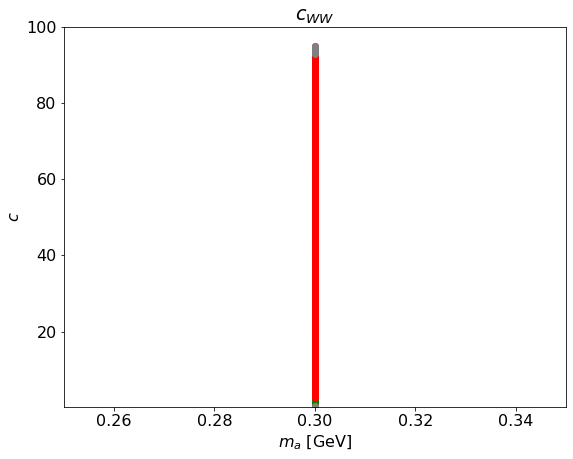

In [15]:
plt.figure(figsize=(9, 7))


plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cWWcheck_comb.dat",0,2)
# plotWhiteRegions(5*10**4)

plt.title('$c_{WW}$')
plt.xlabel('$m_a$ [GeV]')
plt.xlim(0.25,0.35)
plt.ylim(0.1,100)
plt.ylabel('$c$')
# plt.xscale("log")
# plt.yscale("log")

# plt.savefig('plots/LHCb_cWW_check.png', dpi=300, bbox_inches='tight')

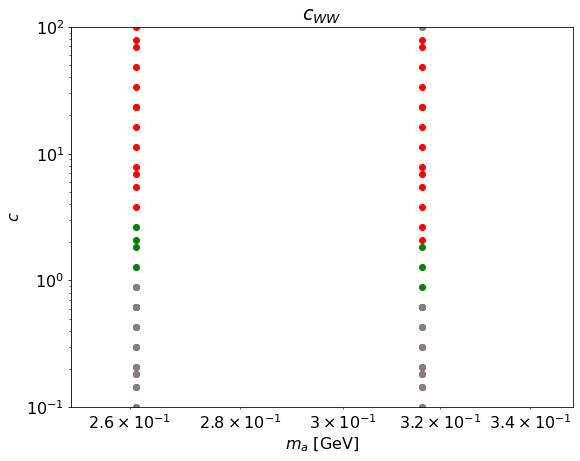

In [16]:
plt.figure(figsize=(9, 7))


plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cWW_comb.dat",0,2)
plotWhiteRegions(5*10**4)

plt.title('$c_{WW}$')
plt.xlabel('$m_a$ [GeV]')
plt.xlim(0.25,0.35)
plt.ylim(0.1,100)
plt.ylabel('$c$')
plt.xscale("log")
plt.yscale("log")

# plt.savefig('plots/LHCb_cWW_zoomed-in.png', dpi=300, bbox_inches='tight')

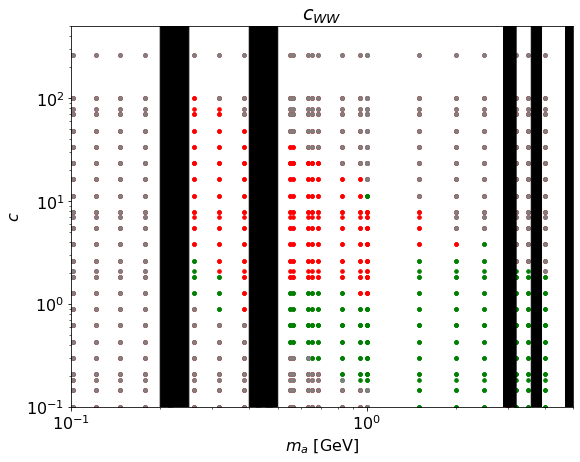

In [70]:
plt.figure(figsize=(9, 7))

plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cWW_comb.dat",0,2)
plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cWW_fine_comb.dat",0,2)
plotWhiteRegions(5*10**4)

plt.title('$c_{WW}$')
plt.xlabel('$m_a$ [GeV]')
plt.xlim(0.1,5)
plt.ylim(10**-1,5*10**2)


plt.ylabel('$c$')
plt.xscale("log")
plt.yscale("log")
# 
plt.savefig('plots/LHCb_cWW.png', dpi=300, bbox_inches='tight')

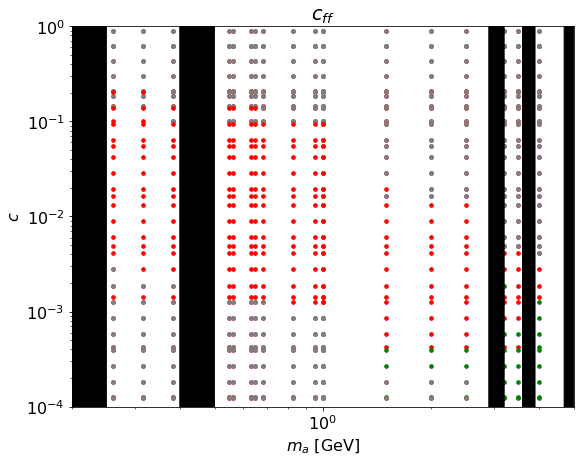

In [76]:
plt.figure(figsize=(9, 7))


plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cff_comb.dat",0,2)
plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cff_fine_comb.dat",0,2)

plotWhiteRegions(5*10**4)

plt.title('$c_{ff}$')
plt.xlabel('$m_a$ [GeV]')
plt.xlim(0.2,5)
plt.ylim(10**-4,1)

plt.ylabel('$c$')
plt.xscale("log")
plt.yscale("log")

plt.savefig('plots/LHCb_cff.png', dpi=300, bbox_inches='tight')

# Real model, m-tau plane

In [ ]:
plt.figure(figsize=(9, 7))


plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cWW_comb.dat",0,1)
#plotWhiteRegions(10**(3))

plt.title('$c_{WW}$')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.1,5)
plt.ylabel('$\\tau_a$')
plt.xscale("log")
plt.yscale("log")

plt.savefig('plots/LHCb_cWW-ctau.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(9, 7))

mass=2.500000e-01

plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cff_comb.dat",0,1)
plotAllAllowed("../Experimental_files/output_combined_R1/m-tau-c-BRBtoKmumu-cff_fine_comb.dat",0,1)
#plotWhiteRegions(10**(3))

plt.title('$c_{ff}$')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.1,5)
plt.ylabel('$\\tau_a$')
plt.xscale("log")
plt.yscale("log")

#plt.savefig('plots/LHCb_cff-ctau.png', dpi=300, bbox_inches='tight')

## prompt search 1508.04094

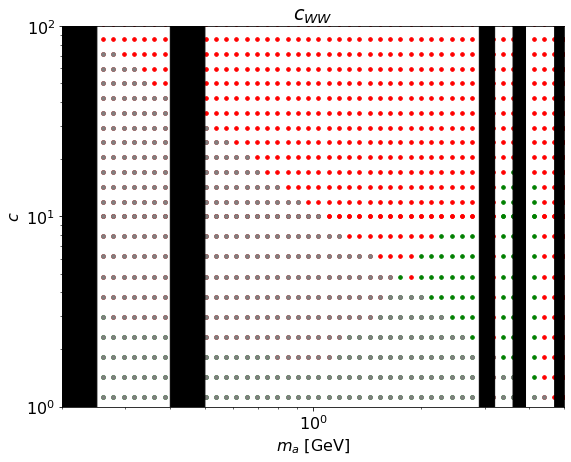

In [72]:
plt.figure(figsize=(9, 7))


plotAllAllowed("../Experimental_files/LHCb_prompt/output_combined/m-tau-c-BRBtoKmumu-cWW-prompt_comb.dat",0,2,\
              prompt=True)
plotAllAllowed("../Experimental_files/LHCb_prompt/output_combined/\
m-tau-c-BRBtoKmumu-cWW-prompt-small-couplings_comb.dat",0,2,\
              prompt=True)

plotWhiteRegions(5*10**4)

plt.title('$c_{WW}$')
plt.xlabel('$m_a$ [GeV]')
plt.xlim(0.2,5)
plt.ylim(1,10**2)

plt.ylabel('$c$')
plt.xscale("log")
plt.yscale("log")

plt.savefig('plots/LHCb_prompt_cWW.png', dpi=300, bbox_inches='tight')

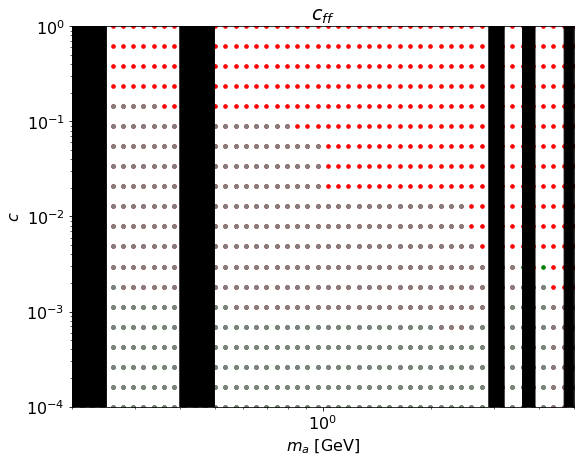

In [73]:
plt.figure(figsize=(9, 7))

plotAllAllowed("../Experimental_files/LHCb_prompt/output_combined/m-tau-c-BRBtoKmumu-cff-prompt_comb.dat",0,2,\
              prompt=True)

plotWhiteRegions(5*10**4)

plt.title('$c_{ff}$')
plt.xlabel('$m_a$ [GeV]')
plt.xlim(0.2,5)
plt.ylim(10**-4,1)

plt.ylabel('$c$')
plt.xscale("log")
plt.yscale("log")

plt.savefig('plots/LHCb_prompt_cff.png', dpi=300, bbox_inches='tight')